## Cohort analysis
Cohort analysis allows businesses to gain a deeper understanding of their customers by tracking their behavior over a period of time. This can help you identify patterns and trends that may not be immediately apparent from looking at vanity metrics.

### Load Dataframe

In [31]:
import pandas as pd

data=pd.read_csv("cohorts.csv")

### Explore Dataframe

In [32]:
data.head(5)

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [33]:
data.shape

(30, 5)

In [34]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


### Correct the datatype of the column

In [36]:
data.Date=pd.to_datetime(data.Date) #datatype of date converted to d

C:\Users\Banu\AppData\Local\Temp\ipykernel_49172\1844708294.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date=pd.to_datetime(data.Date) #datatype of date converted to d


In [37]:
data.dtypes

Date               datetime64[ns]
New users                   int64
Returning users             int64
Duration Day 1            float64
Duration Day 7            float64
dtype: object

### Check for missing data

In [38]:
data.isnull().sum() #no missing values

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

### Check for duplicate rows

In [39]:
duplicates=data.duplicated()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

### Check for Outliers

<Axes: >

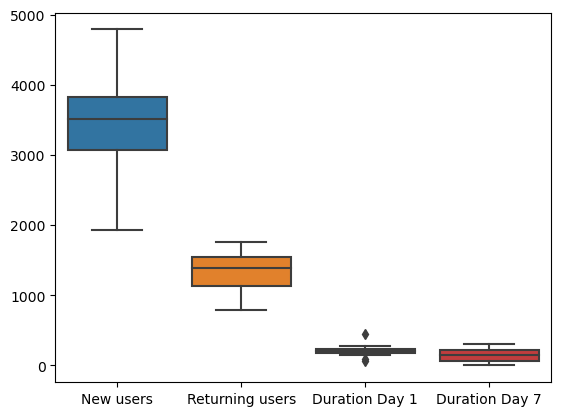

In [40]:
import seaborn as sns
sns.boxplot(data)

### Interpretation from box plot
Median of 'New users' and 'Returning users' are significantly different from each other 

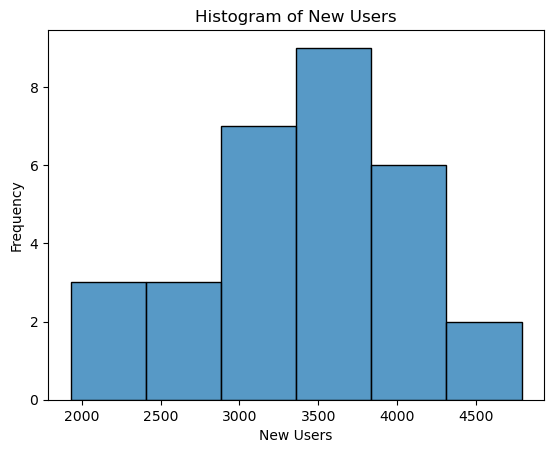

In [41]:

import matplotlib.pyplot as plt

sns.histplot(data['New users'])  
plt.title('Histogram of New Users')
plt.xlabel('New Users')
plt.ylabel('Frequency')
plt.show()

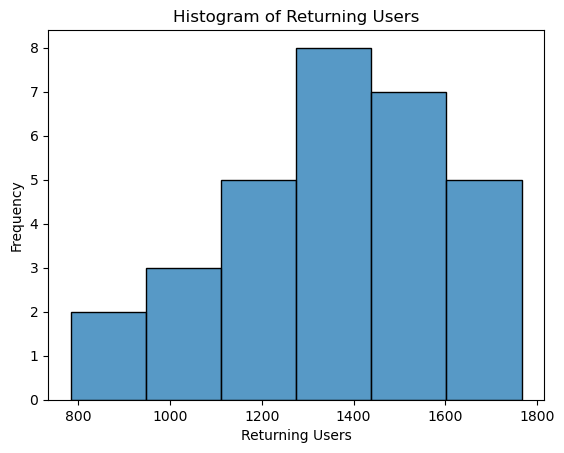

In [42]:
sns.histplot(data['Returning users'])  
plt.title('Histogram of Returning Users')
plt.xlabel('Returning Users')
plt.ylabel('Frequency')
plt.show()

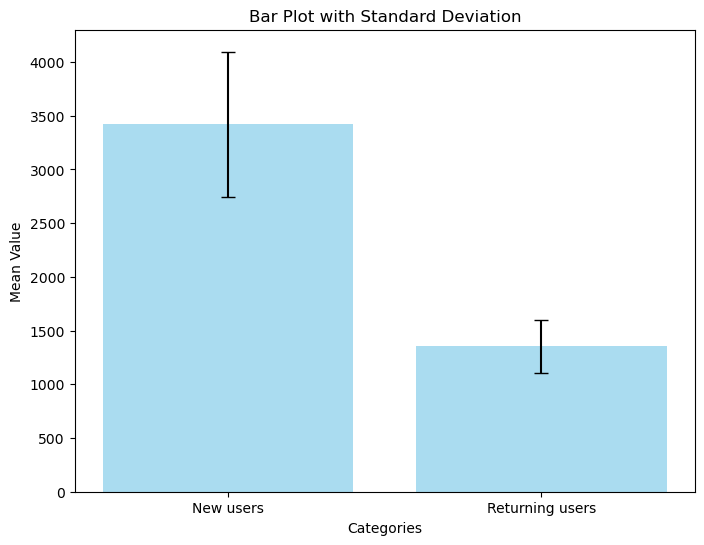

In [43]:
import matplotlib.pyplot as plt

# Sample DataFrame
bar_data = {'Category': ['New users', 'Returning users'],
            'Mean_Value': [3418.166667, 1352.866667],
            'Std_Dev': [677.407486, 246.793189]}

df = pd.DataFrame(bar_data)

# Plotting the bar plot with standard deviation using plt.bar
plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Mean_Value'], yerr=df['Std_Dev'], capsize=5, color='skyblue', alpha=0.7)

# Adding labels and title
plt.title('Bar Plot with Standard Deviation')
plt.xlabel('Categories')
plt.ylabel('Mean Value')

# Show the plot
plt.show()


### Interpretation from bar plot
Also, Mean of 'New users' and 'Returning users' are significantly different from each other as their mean and standard deviation are not overlapping each other.

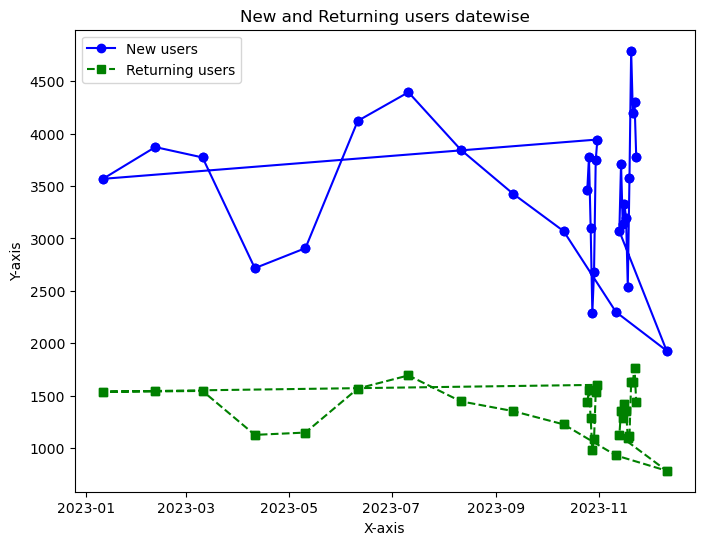

In [44]:

df1 = data[['Date','New users']]
df2 = data[['Date','Returning users']]

# Plotting two line plots with data points as markers
plt.figure(figsize=(8, 6))

# First line plot
plt.plot(df1['Date'], df1['New users'], marker='o', linestyle='-', color='blue', label='New users')

# Second line plot
plt.plot(df2['Date'], df2['Returning users'], marker='s', linestyle='--', color='green', label='Returning users')

# Adding labels and title
plt.title('New and Returning users datewise')
plt.xlabel('Date')
plt.ylabel('No. of users')

# Show data points with markers for both lines
plt.scatter(df1['Date'], df1['New users'], color='blue', marker='o')
plt.scatter(df2['Date'], df2['Returning users'], color='green', marker='s')

# Adding legend
plt.legend()

# Show the plot
plt.show()


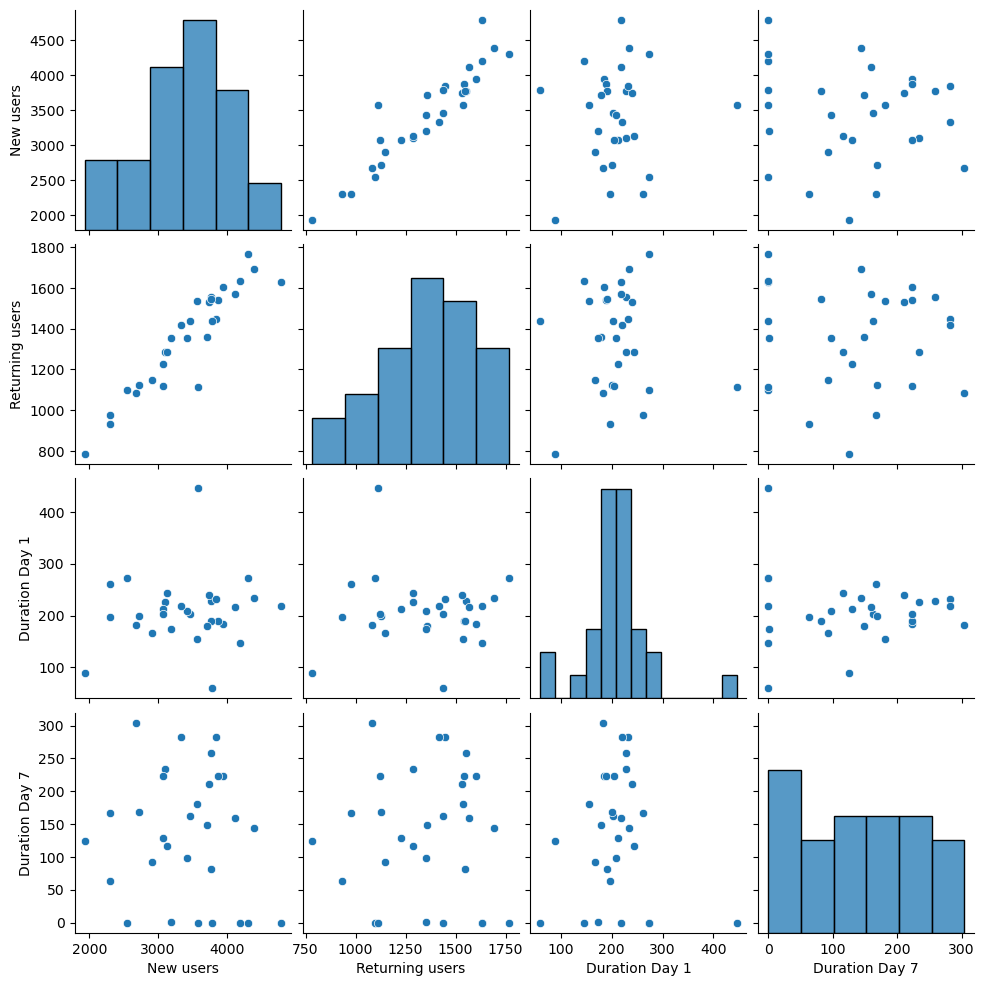

In [45]:
sns.pairplot(data)

In [46]:
data.corr()

C:\Users\Banu\AppData\Local\Temp\ipykernel_49172\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,New users,Returning users,Duration Day 1,Duration Day 7
New users,1.000000,0.931525,0.104128,-0.122078
Returning users,0.931525,1.000000,-0.014642,-0.018320
Duration Day 1,0.104128,-0.014642,1.000000,-0.063820
Duration Day 7,-0.122078,-0.018320,-0.063820,1.000000


### Interpretation from pairplot and Correlation matrix
Positive correlation exists between New users and Returning users. This indicates a potential trend of new users converting to returning users.

### Cohort analysis
Grouping the data by week and calculating the necessary averages:

In [47]:
data['Week'] = data['Date'].dt.isocalendar().week

In [48]:
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7,Week
0,2023-10-25,3461,1437,202.156977,162.523809,43
1,2023-10-26,3777,1554,228.631944,258.147059,43
2,2023-10-27,3100,1288,227.185841,233.550000,43
3,2023-10-28,2293,978,261.079545,167.357143,43
4,2023-10-29,2678,1082,182.567568,304.350000,43


In [49]:
weekly_averages = data.groupby('Week').agg({'New users':'mean','Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()
print(weekly_averages)


    Week    New users  Returning users  Duration Day 1  Duration Day 7
0      2  3568.000000          1538.00      154.312925      180.655172
1      6  3871.000000          1540.00      188.531250      223.137931
2     10  3772.000000          1545.00      189.689394       81.705882
3     15  2716.000000          1126.00      200.044643      169.000000
4     19  2907.000000          1148.00      166.305556       92.200000
5     23  4121.000000          1568.00      217.125604      159.545455
6     28  4394.000000          1693.00      233.579235      144.083333
7     32  3846.000000          1446.00      231.350746      282.500000
8     37  3426.000000          1353.00      209.083969       98.097561
9     41  3069.000000          1226.00      211.943182      129.476191
10    43  3061.800000          1267.80      220.324375      225.185602
11    44  3845.500000          1567.50      212.369200      217.181707
12    45  2298.000000           930.00      197.261905       64.083333
13    

In [50]:
data= pd.DataFrame(weekly_averages)
data

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,2,3568.000000,1538.00,154.312925,180.655172
1,6,3871.000000,1540.00,188.531250,223.137931
2,10,3772.000000,1545.00,189.689394,81.705882
3,15,2716.000000,1126.00,200.044643,169.000000
4,19,2907.000000,1148.00,166.305556,92.200000
5,23,4121.000000,1568.00,217.125604,159.545455
6,28,4394.000000,1693.00,233.579235,144.083333
7,32,3846.000000,1446.00,231.350746,282.500000
8,37,3426.000000,1353.00,209.083969,98.097561
9,41,3069.000000,1226.00,211.943182,129.476191


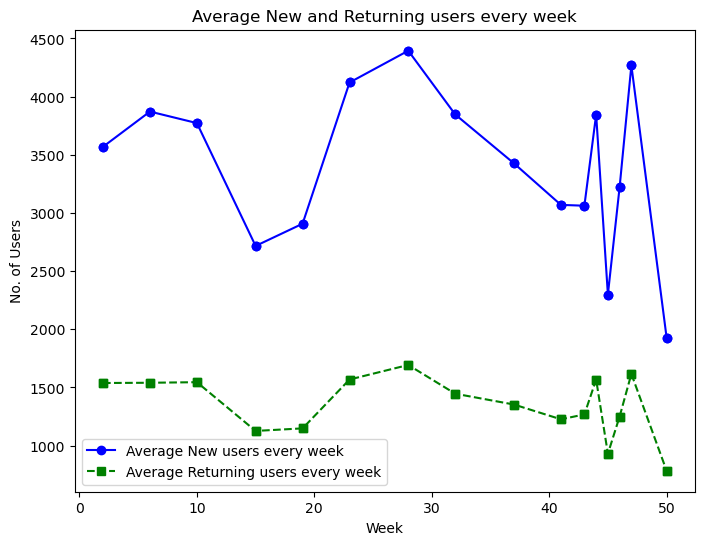

In [53]:
df3 = data[['Week','New users']]
df4 = data[['Week','Returning users']]

# Plotting two line plots with data points as markers
plt.figure(figsize=(8, 6))

# First line plot
plt.plot(df3['Week'], df3['New users'], marker='o', linestyle='-', color='blue', label='Average New users every week')

# Second line plot
plt.plot(df4['Week'], df4['Returning users'], marker='s', linestyle='--', color='green', label='Average Returning users every week')

# Adding labels and title
plt.title('Average New and Returning users every week')
plt.xlabel('Week')
plt.ylabel('No. of Users')

# Show data points with markers for both lines
plt.scatter(df3['Week'], df3['New users'], color='blue', marker='o')
plt.scatter(df4['Week'], df4['Returning users'], color='green', marker='s')

# Adding legend
plt.legend()

# Show the plot
plt.show()

Average New users was found to be significantly greater than the average returning users every week

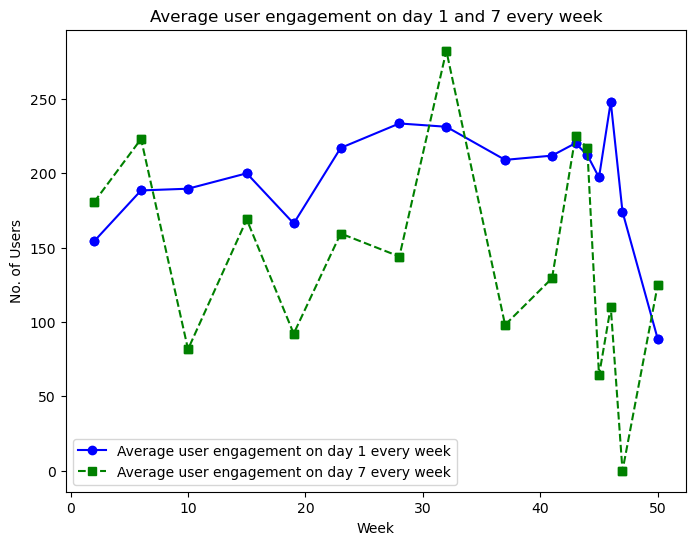

In [56]:
df5 = data[['Week','Duration Day 1']]
df6 = data[['Week','Duration Day 7']]

# Plotting two line plots with data points as markers
plt.figure(figsize=(8, 6))

# First line plot
plt.plot(df5['Week'], df5['Duration Day 1'], marker='o', linestyle='-', color='blue', label='Average user engagement on day 1 every week')

# Second line plot
plt.plot(df6['Week'], df6['Duration Day 7'], marker='s', linestyle='--', color='green', label='Average user engagement on day 7 every week')

# Adding labels and title
plt.title('Average user engagement on day 1 and 7 every week')
plt.xlabel('Week')
plt.ylabel('No. of Users')

# Show data points with markers for both lines
plt.scatter(df5['Week'], df5['Duration Day 1'], color='blue', marker='o')
plt.scatter(df6['Week'], df6['Duration Day 7'], color='green', marker='s')

# Adding legend
plt.legend()

# Show the plot
plt.show()

There seem to be no significant difference between the average user engagement on day 1 and day 7 when investigated across every week

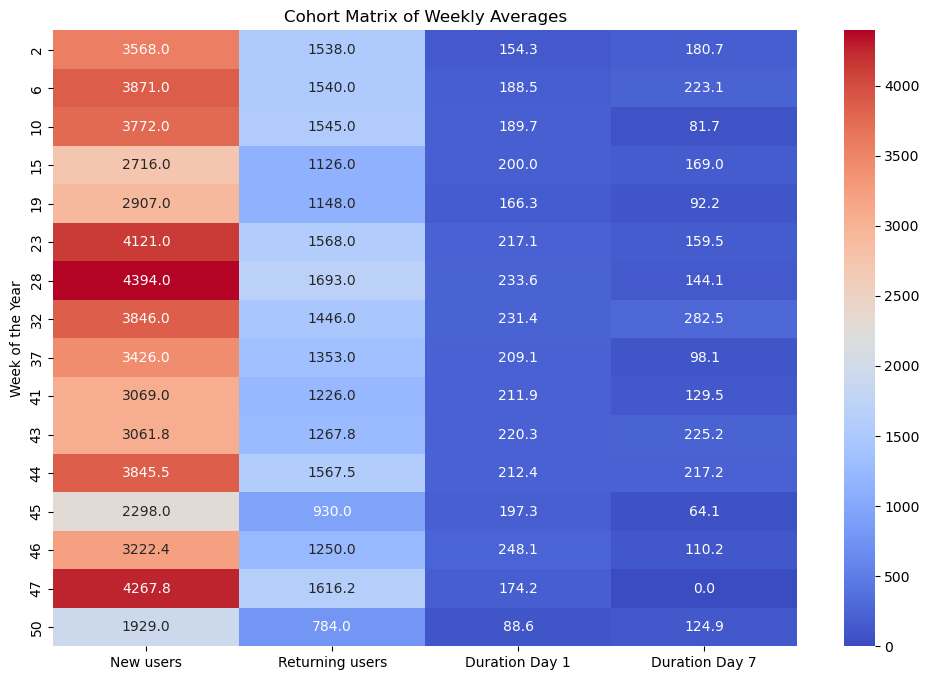

In [59]:
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

## Insights:
    1.Average 'New users' and 'Returning users' across each day are significantly different from each other as their mean and standard deviation are not overlapping each other.
    2.Positive correlation exists between New users and Returning users. This indicates a potential trend of new users converting to returning users.
    3.Average New users was found to be significantly greater than the average returning users every week.
    4.There seem to be no significant difference between the average user engagement on day 1 and day 7 when investigated across every week